In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from contextual_bandit import LinUCB, LinThompsonSampling

In [2]:
# 実験設定
## アクション数
n_action=10

## ラウンド回数
T=1000

## シミュレーション回数
n_sim=10

## アクション特徴量の次元
dim_action_context=3

## 時刻tに依存したユーザー特徴量の次元
dim_user_context=3

## 真の報酬モデルの誤差項の分散
noise_ver=1.

## 乱数値
seed=12345

## UCBスコアにモデルの分散を考慮する度合いパラメータ
alpha=3.

## デザイン行列の初期化に依存したパラメータの(LinUCB), ガウス事前分布の分散(LinTS)
noise_zero_ver=1.

In [3]:
reward_results = defaultdict(list)
regret_results = defaultdict(list)

for _ in range(n_sim):
    # LinUCB
    model = LinUCB(
        T=T,
        n_action=n_action,
        dim_action_context=dim_action_context,
        dim_user_context=dim_user_context,
        noise_ver=noise_ver,
        seed=seed,
        noise_zero_ver=noise_zero_ver,
        alpha=alpha,
    )
    cumulative_reward, cumulative_regret = model.run()
    reward_results["LinUCB"].append(cumulative_reward)
    regret_results["LinUCB"].append(cumulative_regret)
    
    # LinTS
    model = LinThompsonSampling(
        T=T,
        n_action=n_action,
        dim_action_context=dim_action_context,
        dim_user_context=dim_user_context,
        noise_ver=noise_ver,
        seed=seed,
        noise_zero_ver=noise_zero_ver,
    )
    cumulative_reward, cumulative_regret = model.run()
    reward_results["LinTS"].append(cumulative_reward)
    regret_results["LinTS"].append(cumulative_regret)
    

mean_reward = {}
for policy_name, cumulative_rewards in reward_results.items():
    mean_reward[policy_name] = np.array(cumulative_rewards).mean(0)

mean_regret = {}
for policy_name, cumulative_regrets in regret_results.items():
    mean_regret[policy_name] = np.array(cumulative_regrets).mean(0)

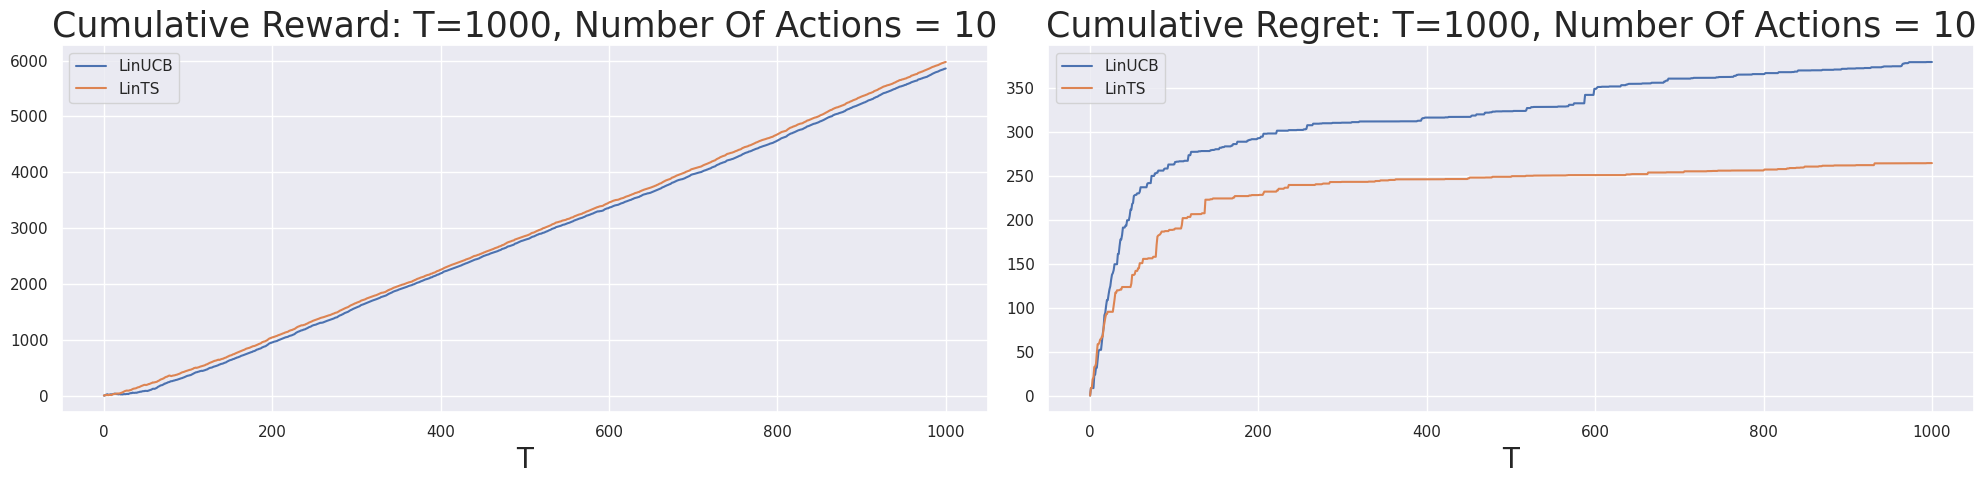

In [4]:
# plot
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title(f'Cumulative Reward: T={T}, Number Of Actions = {n_action}', fontsize=25)
for policy_name, cumulative_reward in mean_reward.items():
    plt.plot(cumulative_reward, label=policy_name)

plt.xlabel('T', fontsize=20)
plt.legend()
plt.tight_layout()
    
plt.subplot(1, 2, 2)
plt.title(f'Cumulative Regret: T={T}, Number Of Actions = {n_action}', fontsize=25)
for policy_name, cumulative_regret in mean_regret.items():
    plt.plot(cumulative_regret, label=policy_name)

plt.xlabel('T', fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()